#  Markov Chains — Notes

---

## **1. Sampling Dependent Random Variables**

Suppose $X$ and $Y$ have the following **joint probability mass function**:

| $P(X=x, Y=y)$ | $y=0$ | $y=1$ |
|:---------------|:------|:------|
| $x=0$ | $1/12$ | $2/12$ |
| $x=1$ | $6/12$ | $3/12$ |

We can sample $(X, Y)$ by two methods.

---

### **Method 1 — Using a Single Variable**

Define a variable $Z$ taking values $0, 1, 2, 3$ with:

| $z$ | $P(Z=z)$ |
|-----|-----------|
| 0 | $1/12$ |
| 1 | $2/12$ |
| 2 | $6/12$ |
| 3 | $3/12$ |

Then define a mapping $f$:
| $z$ | $f(z)$ |
|-----|---------|
| 0 | $(0,0)$ |
| 1 | $(0,1)$ |
| 2 | $(1,0)$ |
| 3 | $(1,1)$ |

Sampling $Z$ and computing $f(Z)$ gives one realization of $(X,Y)$.

---

### **Method 2 — Conditional Sampling**

**Step 1:** Sample $X$ from its **marginal distribution** (row sums):

| $x$ | $P(X=x)$  |
|-----|-----------|
| 0   | $3/12$    |
| 1   | $9/12$    |

**Step 2:** Given $X$, sample $Y$ from its **conditional distribution**.

If $X=0$:

| $y$ | $P(Y=y, X=0)$  |
|-----|---------------|
| 0   | $1/3$         |
| 1   | $2/3$         |

If $X=1$:

| $y$ | $P(Y=y, X=1)$ |
|-----|--------------|
| 0   |        $2/3$ |
| 1   | $1/3$        |

Each conditional is obtained by dividing the row by its sum.

---

### **Generalization**

For any two discrete random variables $X$ and $Y$, we can sample by:

1. Sampling $X$ from its marginal distribution (row sums).  
2. Sampling $Y$ from the conditional distribution $P(Y|X)$.

---

## **2. Sampling Multiple Dependent Variables**

For random variables $X_0, X_1, \ldots, X_{n-1}$ with known joint distribution:

1. Sample $X_0$ from its marginal.  
2. Sample $X_1$ given $X_0$.  
3. Sample $X_2$ given $(X_0, X_1)$.  
4. Continue sampling $X_k$ given the previously sampled values.

This requires knowing the full set of conditional distributions  
$P(X_k|X_0,\ldots,X_{k-1})$, which can become intractable.

---

## **3. The Markov Assumption**

Simplification: assume that for each $k$,

$$
P(X_k | X_0, X_1, \ldots, X_{k-1}) = P(X_k | X_{k-1}).
$$

This is the **Markov property** — the future depends only on the present, not on the past.

---

## **4. Markov Chains**

A **Markov chain** with state space $S = \{0,1,\ldots,K-1\}$ is a sequence  
$X_0, X_1, \ldots, X_{n-1}$ satisfying:

- Each $X_t \in S$
- $P(X_{t+1}=j|X_0,\ldots,X_t) = P(X_{t+1}=j|X_t)$

The system evolves according to a **transition matrix** $Q(t)$.

---

### **Transition Matrix**

The $(i,j)$-entry gives:

$$
q_{ij}(t) = P(X_{t+1}=j \mid X_t=i)
$$

If $Q(t)$ is the same for all $t$, the chain is **stationary**,  
and we write $Q$ instead of $Q(t)$.

---

## **5. Examples**

### **Example 1 — IID Case**

If $X_t$ are iid with $P(X_t = j) = p_j$, then the transition matrix has identical rows:

$$
Q =
\begin{bmatrix}
p_0 & p_1 & \cdots & p_{K-1} \\
p_0 & p_1 & \cdots & p_{K-1} \\
\vdots & \vdots & \ddots & \vdots \\
p_0 & p_1 & \cdots & p_{K-1}
\end{bmatrix}
$$

---

### **Example 2 — Controlling the House**

States: $\{0,1\}$ where 0 = D, 1 = R.

- $P(D \to D) = 0.3$
- $P(R \to R) = 0.4$

Transition matrix:

$$
Q =
\begin{bmatrix}
0.3 & 0.7 \\
0.6 & 0.4
\end{bmatrix}
$$

---

### **Example 3 — The Gamophobe**

Person X alternates dates among partners $\{0,1,2\}$ with transition matrix:

$$
Q =
\begin{bmatrix}
1/6 & 2/6 & 3/6 \\
1/2 & 0 & 1/2 \\
1/4 & 1/4 & 1/2
\end{bmatrix}
$$

---

### **Example 4 — Random Walk with Reflecting Boundaries (v1)**

State space: $\{0,1,2,3,4\}$.

At boundaries, reflection occurs (no moving beyond the edge).  
Transition matrix:

$$
Q =
\begin{bmatrix}
0 & 1 & 0 & 0 & 0 \\
1/2 & 0 & 1/2 & 0 & 0 \\
0 & 1/2 & 0 & 1/2 & 0 \\
0 & 0 & 1/2 & 0 & 1/2 \\
0 & 0 & 0 & 1 & 0
\end{bmatrix}
$$

---

### **Example 5 — Random Walk with Reflecting Boundaries (v2)**

Now reflections allow staying put with equal probability:

$$
Q =
\begin{bmatrix}
1/2 & 1/2 & 0 & 0 & 0 \\
1/2 & 0 & 1/2 & 0 & 0 \\
0 & 1/2 & 0 & 1/2 & 0 \\
0 & 0 & 1/2 & 0 & 1/2 \\
0 & 0 & 0 & 1/2 & 1/2
\end{bmatrix}
$$

---

### **Example 6 — Weather**

Time-dependent transition matrix:

$$
Q(t) =
\begin{bmatrix}
\frac{1}{3} + \frac{t}{120} & \frac{2}{3} - \frac{t}{120} \\
\frac{1}{2} - \frac{t}{180} & \frac{1}{2} + \frac{t}{180}
\end{bmatrix}
$$

---

## **6. Stochastic Matrices**

A **stochastic matrix** has:
- Nonnegative entries
- Each row sums to 1

A **doubly stochastic matrix** also has columns that sum to 1.

Transition matrices are always stochastic, but not necessarily doubly stochastic.

---

## **7. One-Step Distributions**

If $\pi_i = P(X_t = i)$ and $\tilde{\pi}_j = P(X_{t+1} = j)$, then:

$$
\tilde{\pi}_j = \sum_i \pi_i q_{ij}
$$

In vector form:

$$
\tilde{\pi} = \pi Q
$$

---

## **8. m-Step Transition Probabilities**

For nonstationary Markov chains:

$$
P(X_{t+m} = j | X_t = i) = (Q(t) Q(t+1) \cdots Q(t+m-1))_{ij}
$$

If stationary ($Q(t)=Q$):

$$
P(X_{t+m} = j | X_t = i) = (Q^m)_{ij}
$$

and

$$
P(X_{t+m} = j) = (\pi(t) Q^m)_j
$$

---

In [3]:
import numpy as np

**Problem 0**
> Write a function that takes input $N$ (a positive integer) and returns the transition matrix $Q$ for **Example 4** (the reflecting random walk).  
>  
> Test with $N=5$ and confirm agreement with Example 4.

In [4]:
def transition_matrix0(N):
    Q=np.zeros((N,N))
    Q[0,1]=1
    Q[N-1,N-2]=1
    for i in range(1,N-1):
        Q[i,i-1]=.5
        Q[i,i+1]=.5
    return(Q)

**Test code**

In [5]:
transition_matrix0(10)

array([[0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ]])

**Problem 1**

> State space: discrete circle with points  
> $s(i) = (\cos(2\pi i/N), \sin(2\pi i/N))$ for $i=0,\ldots,N-1$.  
>  
> Each state $s(i)$ has two neighbors $s((i+1)\%N)$ and $s((i-1)\%N)$.  
> Transition probabilities:
> $$
> P[X_{t+1}=s((i+1)\%N)|X_t=s(i)] = \frac{2 + 2\sin(2\pi \omega t)}{4}
> $$
> $$
> P[X_{t+1}=s(i)|X_t=s(i)] = \frac{1 - \sin(2\pi \omega t)}{4}
> $$
> $$
> P[X_{t+1}=s((i-1)\%N)|X_t=s(i)] = \frac{1 - \sin(2\pi \omega t)}{4}
> $$
>
> Create a function `transition_matrix1(N, t, omega)` that returns this $N \times N$ transition matrix.  
>  
> **Test Cases:**  
> - `transition_matrix1(10, 0, .01)`  
> - `transition_matrix1(10, 1, .01)`  
> - `transition_matrix1(10, 25, .01)`


In [6]:
def transition_matrix1(N,t,omega):
    Q=np.zeros((N,N))
    for i in range(N):
        iplus=(i+1)%N
        iminus=(i-1)%N
        Q[i,iplus]=.5+.5*np.sin(2*np.pi*omega*t)
        Q[i,i]=.25-.25*np.sin(2*np.pi*omega*t)
        Q[i,iminus]=.25-.25*np.sin(2*np.pi*omega*t)
    return(Q)            
                

**Test code 1**

In [7]:
print(transition_matrix1(10,0,.01).round(3))

[[0.25 0.5  0.   0.   0.   0.   0.   0.   0.   0.25]
 [0.25 0.25 0.5  0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.25 0.25 0.5  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.25 0.25 0.5  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.25 0.25 0.5  0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.25 0.25 0.5  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.25 0.25 0.5  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.25 0.25 0.5  0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.25 0.25 0.5 ]
 [0.5  0.   0.   0.   0.   0.   0.   0.   0.25 0.25]]


**Test code 2**

In [8]:
print(transition_matrix1(10,1,.01).round(3))

[[0.234 0.531 0.    0.    0.    0.    0.    0.    0.    0.234]
 [0.234 0.234 0.531 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.234 0.234 0.531 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.234 0.234 0.531 0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.234 0.234 0.531 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.234 0.234 0.531 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.234 0.234 0.531 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.234 0.234 0.531 0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.234 0.234 0.531]
 [0.531 0.    0.    0.    0.    0.    0.    0.    0.234 0.234]]


**Test code 3**

In [9]:
print(transition_matrix1(10,25,.01).round(3))

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**Problem 2**

> Write a function `mstep_conditional_distribution2(N, omega, t, m)` returning the $N \times N$ matrix with entries:
> $$
> P[X_{t+m}=s(j)|X_t=s(i)]
> $$
>
> Test with `mstep_conditional_distribution2(10, .01, 5, 3)`.

In [10]:
def mstep_conditional_distribution2(N,omega,t,m):
    Q=transition_matrix1(N,t,omega)
    for i in range(1,m):
        Qnew=transition_matrix1(N,t+i,omega)
        Q=np.matmul(Q,Qnew)
    return(Q)

**Test code**

In [11]:
Q=mstep_conditional_distribution2(10,.01,5,3).round(3)
print(Q)

[[0.106 0.273 0.222 0.319 0.    0.    0.    0.004 0.012 0.063]
 [0.063 0.106 0.273 0.222 0.319 0.    0.    0.    0.004 0.012]
 [0.012 0.063 0.106 0.273 0.222 0.319 0.    0.    0.    0.004]
 [0.004 0.012 0.063 0.106 0.273 0.222 0.319 0.    0.    0.   ]
 [0.    0.004 0.012 0.063 0.106 0.273 0.222 0.319 0.    0.   ]
 [0.    0.    0.004 0.012 0.063 0.106 0.273 0.222 0.319 0.   ]
 [0.    0.    0.    0.004 0.012 0.063 0.106 0.273 0.222 0.319]
 [0.319 0.    0.    0.    0.004 0.012 0.063 0.106 0.273 0.222]
 [0.222 0.319 0.    0.    0.    0.004 0.012 0.063 0.106 0.273]
 [0.273 0.222 0.319 0.    0.    0.    0.004 0.012 0.063 0.106]]


**Problem 3**

> Write a **generator** `sample_path_generator(pi, Q)` that generates sample paths for a nonstationary Markov chain:  
> - `pi`: initial distribution (1D array)  
> - `Q`: 3D array of transition matrices ($T\times N\times N$)  
>
> Each call to `next()` should yield a realization `[X_0, X_1, ..., X_{T-1}]`.  
>
> **Test:** Generate 10,000 realizations for a Markov chain with  
> - states `{0,1}`  
> - initial distribution `[1/3, 2/3]`  
> - transition matrix:
>   $$
>   Q(t) =
>   \begin{bmatrix}
>   2/3 + t/30 & 1/3 - t/30 \\
>   1/3 + t/30 & 2/3 - t/30
>   \end{bmatrix}
>   $$
> for $t=0,\ldots,9$.

In [12]:
# Code cell for Problem 3 - do not delete or modify this line
def sample_path_generator(pi, Q):
    T=Q.shape[0]
    N=Q.shape[1]
    while True:
        X=np.zeros(T,dtype=int)
        X[0]=np.random.choice(range(N),p=pi)
        for t in range(1,T):
            X[t]=np.random.choice(range(N),p=Q[t][X[t-1]])
        yield(X)                  

**Test code**

In [13]:
# Test cell 1 for Problem 3 - do not delete or modify this cell
# Do execute it
import numpy as np
pi=np.array([1/3,2/3])
Q=np.zeros((10,2,2))
for t in range(10):
    Q[t]=np.array([[2/3+t/30,1/3-t/30],[1/3+t/30,2/3-t/30]])
print(Q)
X=np.zeros((10000,10),dtype=int)
for i in range(10000):
    g=sample_path_generator(pi,Q)
    X[i,:]=next(g)
print(np.mean(X,axis=0))

[[[0.66666667 0.33333333]
  [0.33333333 0.66666667]]

 [[0.7        0.3       ]
  [0.36666667 0.63333333]]

 [[0.73333333 0.26666667]
  [0.4        0.6       ]]

 [[0.76666667 0.23333333]
  [0.43333333 0.56666667]]

 [[0.8        0.2       ]
  [0.46666667 0.53333333]]

 [[0.83333333 0.16666667]
  [0.5        0.5       ]]

 [[0.86666667 0.13333333]
  [0.53333333 0.46666667]]

 [[0.9        0.1       ]
  [0.56666667 0.43333333]]

 [[0.93333333 0.06666667]
  [0.6        0.4       ]]

 [[0.96666667 0.03333333]
  [0.63333333 0.36666667]]]
[0.6595 0.5164 0.4348 0.38   0.3289 0.2791 0.2235 0.1719 0.127  0.0739]


**Problem 4**

> Write a function `estimate_from_samples(N, X)` that estimates:
> - `pihat`: proportion of paths with $X_0=i$  
> - `Qhat[t,i,j]`: proportion of transitions $X_t=i \to X_{t+1}=j$
>
> Return a dictionary with keys `"pihat"` and `"Qhat"`.  
>  
> Use output from Problem 3’s test code to validate accuracy.

In [14]:
def estimate_from_samples(N,Realizations):
    n=len(Realizations)
    pihat=np.zeros(N)
    T=len(Realizations[0])-1
    Qhat=np.zeros((T,N,N))
    Mcount=np.zeros((T,N))
    for i in range(n):
        X=Realizations[i]
        pihat[X[0]]+=1
        for t in range(T):
            Qhat[t,X[t],X[t+1]]+=1
            Mcount[t,X[t]]+=1
    pihat/=n
    for t in range(T):
        for i in range(N):
            Qhat[t][i]/=Mcount[t][i]
    return {"pihat":pihat, "Qhat":Qhat}

**Test code**

In [15]:
d = estimate_from_samples(2,X)
print(d["pihat"])
print(d["Qhat"])

[0.3405 0.6595]
[[[0.71718062 0.28281938]
  [0.36300227 0.63699773]]

 [[0.74565757 0.25434243]
  [0.39620449 0.60379551]]

 [[0.76132343 0.23867657]
  [0.43629255 0.56370745]]

 [[0.79741935 0.20258065]
  [0.465      0.535     ]]

 [[0.82998063 0.17001937]
  [0.49832776 0.50167224]]

 [[0.87071716 0.12928284]
  [0.53314224 0.46685776]]

 [[0.90199614 0.09800386]
  [0.57136465 0.42863535]]

 [[0.92754498 0.07245502]
  [0.61023851 0.38976149]]

 [[0.96815578 0.03184422]
  [0.63700787 0.36299213]]]


**Problem 5**

> Write a generator `generate_excursion_time(i, Q)` that yields **excursion times** — the number of steps needed to return to the starting state $i$.  
>  
> **Test Case:**  
> For $Q = \begin{bmatrix}1/2 & 1/2 \\ 1/2 & 1/2\end{bmatrix}$ and start $i=1$, generate 10,000 samples.  
> Use `pandas.Series(L).value_counts()/10000` to examine the empirical distribution.


In [16]:
import numpy as np
def generate_excursion_time(i,Q):
    N=Q.shape[0]
    while True:
        X=i
        t=0
        while True:
            X=np.random.choice(range(N),p=Q[X,:])
            #print(i)
            t+=1
            if X==i:
                yield(t) 
                break

**Test code**

If $X_0,X_1,\ldots,$ are iid Bernoulli, then the waiting time for the next 0 has a geometric distribution with parameter $1/2,$ so $P[M=i]=1/2^i$ for $i=1,2,\ldots.$

In [17]:
import pandas as pd
Q=np.array([[.5,.5],[.5,.5]])
g=generate_excursion_time(1,Q)
L=[next(g) for i in range(10000)]
pd.Series(L).value_counts()/10000

1     0.4937
2     0.2519
3     0.1286
4     0.0621
5     0.0324
6     0.0167
7     0.0072
8     0.0041
9     0.0019
10    0.0006
12    0.0003
11    0.0003
15    0.0001
13    0.0001
Name: count, dtype: float64

**Problem 6**

> For the random walk with reflecting boundary (Example 4) with **odd $N$**, estimate the **expected excursion time** starting at the midpoint $(N-1)/2$:
> - Run 10,000 simulations.
> - Compute the mean and 95% confidence interval for $E[M]$.
> - Repeat for:
>   - $N=11$, start $5$
>   - $N=21$, start $10$
>   - $N=31$, start $15$
>   - $N=51$, start $25$

In [18]:
N=11
Q=transition_matrix0(N)
print(Q)
ntrials=10000
g=generate_excursion_time(5,Q)
X=np.array([next(g) for i in range(ntrials)])
est=np.mean(X)
sd=np.std(X)
lowerCI=est-1.96*sd/np.sqrt(ntrials)
upperCI=est+1.96*sd/np.sqrt(ntrials)
print(round(est,2))
print(round(lowerCI,2))
print(round(upperCI,2))

[[0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0. ]]
10.15
9.85
10.46


In [19]:
N=21
Q=transition_matrix0(N)
ntrials=10000
g=generate_excursion_time(10,Q)
X=np.array([next(g) for i in range(ntrials)])
est=np.mean(X)
sd=np.std(X)
lowerCI=est-1.96*sd/np.sqrt(ntrials)
upperCI=est+1.96*sd/np.sqrt(ntrials)
print(round(est,2))
print(round(lowerCI,2))
print(round(upperCI,2))

20.01
19.06
20.95


In [20]:
N=31
Q=transition_matrix0(N)
ntrials=10000
g=generate_excursion_time(15,Q)
X=np.array([next(g) for i in range(ntrials)])
est=np.mean(X)
sd=np.std(X)
lowerCI=est-1.96*sd/np.sqrt(ntrials)
upperCI=est+1.96*sd/np.sqrt(ntrials)
print(round(est,2))
print(round(lowerCI,2))
print(round(upperCI,2))

28.2
26.55
29.84


In [21]:
N=51
Q=transition_matrix0(N)
ntrials=10000
g=generate_excursion_time(25,Q)
X=np.array([next(g) for i in range(ntrials)])
est=np.mean(X)
sd=np.std(X)
lowerCI=est-1.96*sd/np.sqrt(ntrials)
upperCI=est+1.96*sd/np.sqrt(ntrials)
print(round(est,2))
print(round(lowerCI,2))
print(round(upperCI,2))

51.45
47.6
55.3


**Problem 7**
> For the same random walk, estimate the probability that starting at $(N-1)/2$ we hit a **boundary state** $(0$ or $N-1)$ before returning to start.
>
> - Write a generator that simulates and returns a Boolean for whether the boundary was hit first.  
> - Estimate the probability for small odd $N=3,5,7,\ldots$  
> - Try to identify a formula for this probability as a function of $N$.

Here is code for a generator of Booleans for the Markov chain that indicate whether we hit the boundary before coming back to N/2.

In [22]:
import numpy as np
def generator_for_event(N):
    Q=transition_matrix0(N)
    while True:
        X=int((N-1)/2)
        X=np.random.choice(range(N),p=Q[X,:])
        while True:
            if X==0 or X==N-1:
                yield True
                break
            if X==int((N-1)/2):
                yield False
                break
            X=np.random.choice(range(N),p=Q[X,:])

In [23]:
est=[]
for N in range(3,31,2):
    ntrials=10000
    g=generator_for_event(N)
    X=np.array([next(g) for i in range(ntrials)])
    e=np.mean(X)
    print(N,e)
    est.append(np.mean(X))

3 1.0
5 0.5081
7 0.3333
9 0.253
11 0.1972
13 0.1648
15 0.144
17 0.1259
19 0.1097
21 0.0997
23 0.0905
25 0.0826
27 0.0811
29 0.0737


The values are getting smaller and smaller as N grows, and it sure looks like the formula for p as a functioin of N is 2/(N-1). Try plotting the reciprocal of the probability and compare to the reciprocal of this formula.

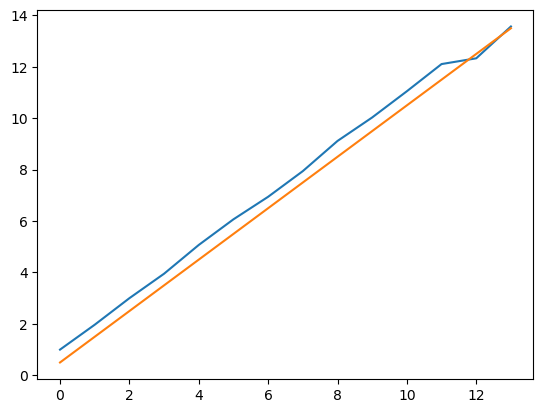

In [24]:
import matplotlib.pyplot as plt
plt.plot(1/np.array(est))
plt.plot(.5*np.array(range(3,31,2))-1)

Test formula for a large value of N.

In [25]:
N=101
ntrials=10000
g=generator_for_event(N)
X=np.array([next(g) for i in range(ntrials)])
e=np.mean(X)
print(e)
print(2/(N-1))

0.0195
0.02


**Demonstration of Ergodicity**

Here we consider only stationary Markov chains so we have a space space $S = \{ 0,1,\ldots,K-1\}$ and
a $K \times K$ transition matrix $Q.$

Let's create a random transition matrix for a Markov chain.

In [1]:
import numpy as np
K=10
Q=np.zeros((K,K))
for i in range(K):
    row=np.random.uniform(0,1,K)
    row=row/np.sum(row)
    Q[i:,]=row
Q

array([[0.08474113, 0.15194552, 0.11362999, 0.11163591, 0.16743287,
        0.10739624, 0.12549551, 0.01410981, 0.01678325, 0.10682978],
       [0.20854425, 0.25239428, 0.02132373, 0.02965674, 0.10883598,
        0.09498074, 0.11770504, 0.02844909, 0.07152095, 0.06658921],
       [0.10602427, 0.05074539, 0.15285916, 0.15328223, 0.11768401,
        0.08375046, 0.11336938, 0.15294009, 0.06132411, 0.00802089],
       [0.20854832, 0.01850224, 0.10838837, 0.16530702, 0.02267041,
        0.01563727, 0.11305436, 0.12523318, 0.19638162, 0.02627721],
       [0.1152666 , 0.00765735, 0.12127363, 0.16000317, 0.11753561,
        0.14804793, 0.00992992, 0.08015414, 0.15379072, 0.08634093],
       [0.02921579, 0.01857709, 0.06133514, 0.09156393, 0.1206679 ,
        0.14504451, 0.07161435, 0.19604362, 0.06998605, 0.19595163],
       [0.0726617 , 0.21046785, 0.17993474, 0.03128303, 0.02765111,
        0.08499636, 0.10487265, 0.07160232, 0.18264729, 0.03388294],
       [0.06019531, 0.1193146 , 0.1464107

**n-th Powers gives n-step transition probabilities**

In [2]:
for i in range(1,20):
    print("i = "+str(i))
    print(np.round(np.linalg.matrix_power(Q,i),3))
    print("\n")

i = 1
[[0.085 0.152 0.114 0.112 0.167 0.107 0.125 0.014 0.017 0.107]
 [0.209 0.252 0.021 0.03  0.109 0.095 0.118 0.028 0.072 0.067]
 [0.106 0.051 0.153 0.153 0.118 0.084 0.113 0.153 0.061 0.008]
 [0.209 0.019 0.108 0.165 0.023 0.016 0.113 0.125 0.196 0.026]
 [0.115 0.008 0.121 0.16  0.118 0.148 0.01  0.08  0.154 0.086]
 [0.029 0.019 0.061 0.092 0.121 0.145 0.072 0.196 0.07  0.196]
 [0.073 0.21  0.18  0.031 0.028 0.085 0.105 0.072 0.183 0.034]
 [0.06  0.119 0.146 0.026 0.038 0.17  0.156 0.096 0.162 0.026]
 [0.067 0.16  0.106 0.03  0.162 0.076 0.208 0.04  0.028 0.122]
 [0.115 0.049 0.176 0.177 0.162 0.011 0.067 0.1   0.064 0.079]]


i = 2
[[0.12  0.098 0.114 0.11  0.103 0.091 0.089 0.093 0.107 0.074]
 [0.117 0.143 0.099 0.083 0.117 0.1   0.106 0.065 0.084 0.087]
 [0.106 0.094 0.123 0.099 0.089 0.101 0.11  0.097 0.117 0.062]
 [0.102 0.117 0.127 0.09  0.102 0.088 0.135 0.076 0.097 0.067]
 [0.101 0.073 0.118 0.113 0.112 0.092 0.11  0.102 0.094 0.085]
 [0.094 0.077 0.13  0.105 0.1   0.097 0.

**Left Eigenvalues/Eigenvectors of Q**

In [3]:
e=np.linalg.eig(Q.T)
print(e)

EigResult(eigenvalues=array([ 1.        +0.j        , -0.18346516+0.j        ,
        0.17255835+0.12348807j,  0.17255835-0.12348807j,
        0.16807   +0.j        , -0.05759046+0.05315126j,
       -0.05759046-0.05315126j, -0.00256846+0.09921929j,
       -0.00256846-0.09921929j,  0.0171279 +0.j        ]), eigenvectors=array([[ 0.33658757+0.j        , -0.00803624+0.j        ,
        -0.03042207-0.18342588j, -0.03042207+0.18342588j,
        -0.59013034+0.j        ,  0.08099868-0.3745668j ,
         0.08099868+0.3745668j , -0.39810046+0.11019331j,
        -0.39810046-0.11019331j,  0.21438943+0.j        ],
       [ 0.3359384 +0.j        , -0.04164015+0.j        ,
         0.58926559+0.j        ,  0.58926559-0.j        ,
        -0.07574727+0.j        ,  0.01300274+0.21971858j,
         0.01300274-0.21971858j,  0.10439071-0.13297216j,
         0.10439071+0.13297216j,  0.13017849+0.j        ],
       [ 0.36990753+0.j        , -0.31040958+0.j        ,
        -0.19977137+0.23913509j, -0.19

**The eigenvector correspondong to eigenvalue 1 normalized**

In [4]:
np.round(e[1][:,0]/np.sum(e[1][:,0]),3)

array([0.107+0.j, 0.107+0.j, 0.118+0.j, 0.096+0.j, 0.104+0.j, 0.095+0.j,
       0.109+0.j, 0.089+0.j, 0.1  +0.j, 0.074+0.j])

**Interpretation of all rows equal**

Starting in any state i, the probability we land in state j in n steps is given by the $j$-th entry of

$$
e^{(i)} Q^n 
$$

where $e^{(i)}$ denotes the vector $[0,0,\ldots,0,1,0,\ldots,0]$ has a 1 in position i.

The probability is $Q^n_{ij}.$ 

We see that for large $n$ 

- no matter where we start, the probability distribution of where we land is roughtly the same,

- this distribution $\pi$ converges to a particular distribution $\pi$ that does not depend on $n,$

- this limiting distribution satisfies $\pi Q = \pi,$ the *stationary* distribution of the Markov chain.

    - this $\pi$ is the left-eigenvector of $Q$ with eigenvalue 1.



**Symmetric case**

Consider the case where out transition matrix is symmetric. Here we consider powers of a random symmetric matrix.

In [5]:
import numpy as np
K=5
Q=np.zeros((K,K))
for i in range(K):
    for j in range(i+1,K):
        Q[i,j]=np.random.uniform(0,1/K)
        Q[j,i]=Q[i,j]
for i in range(K):
    Q[i,i]=1.-np.sum(Q[i,:])
print(np.round(Q,3))


[[0.731 0.063 0.036 0.034 0.135]
 [0.063 0.633 0.004 0.111 0.189]
 [0.036 0.004 0.745 0.128 0.087]
 [0.034 0.111 0.128 0.553 0.174]
 [0.135 0.189 0.087 0.174 0.415]]


In [6]:
print("\n")
print(np.round(np.linalg.matrix_power(Q,30),3))



[[0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]]


**When does Ergodicity fail?**

One way things can go wrong is that we can have *periodicity*.

Consider this example.

In [7]:
import numpy as np
Q=np.zeros((8,8))
Q[0,1]=.5
Q[1,2]=1
Q[2,0]=1
Q[0,3]=.5
Q[3,4]=1
Q[4,5]=1
Q[5,6]=1
Q[6,7]=1
Q[7,0]=1
print(Q)

[[0.  0.5 0.  0.5 0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0.  0.  0. ]]


In [8]:
print(np.round(np.linalg.matrix_power(Q,10),3))

[[0.    0.312 0.    0.312 0.    0.    0.375 0.   ]
 [0.    0.    0.375 0.    0.375 0.    0.    0.25 ]
 [0.625 0.    0.    0.    0.    0.375 0.    0.   ]
 [0.    0.    0.25  0.    0.25  0.    0.    0.5  ]
 [0.75  0.    0.    0.    0.    0.25  0.    0.   ]
 [0.    0.375 0.    0.375 0.    0.    0.25  0.   ]
 [0.    0.    0.375 0.    0.375 0.    0.    0.25 ]
 [0.625 0.    0.    0.    0.    0.375 0.    0.   ]]


Here, we can get from any state to any other state. But we do not see ergodicity. The issue here is what is called *periodicity*. Formally, the *period* of state $i$ is defined as follows.

Find the set of $D_i$ distances of possible paths (paths starting from $i$ and ending with $i$ i.e.
$$
D_i = \{ n>0 ~:~ (Q^n)_{ii} >0 \}
$$

and define the period of $i$ to be the greatest common divisor of this set. of path lengths i.e.

We say a Markov chain is aperiodic if the period of every states is 1.

**Example 1** 

![Example1.png](attachment:68fd117e-301f-4cae-9838-a8dbc8ef62c5.png)

In this example, an arrow appears for every non-zero entry in the transition matrix so our transition matrix looks like this:

$$
Q = \left[ \begin{array}{ccc}
0 & * & * \\
0 & 0 & * \\
* & * & * \\
\end{array}
\right]
$$

where the * indicates a non-zero entry. This matrix shows us the **one-step** paths.

The paths from 0 to 0 can have lengths 3, 4, 5, ... and the gcd of this set is 1 so $d_0=1$

The paths from 1 to 1 can be of length 3, 4, 5, ... so $d_1 = 1$

The paths from 2 to 2 can be of length 1,2,... so $d_2 = 1$.

The chain is aperiodic. Consider an example of a transition matrix with this structure and look at powers of it.

In [9]:
import numpy as np

Q=np.array([[0,.3,.7],[0.,0.,1.],[.3,.2,.5]])
print(np.round(np.linalg.matrix_power(Q,30),3))

[[0.189 0.182 0.629]
 [0.189 0.182 0.629]
 [0.189 0.182 0.629]]


![Example2.png](attachment:4f09e41d-df46-404a-8da5-c118173be120.png)

**Example 2** 

Suppose our chain has the one step paths shown above.
Now our transition matrix looks like this:

$$
Q = \left[ \begin{array}{ccc}
0 & * & * & 0 & 0 & 0  \\
* & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & * & 0 & 0 & 0  \\
0 & 0 & 0 & * & 0 & 0 \\
0 & 0 & 0 & 0 & * & 0  \\
* & 0 & 0 & 0 & 0 & 0 \\
\end{array}
\right]
$$

where the * indicates a non-zero entry.

Now 0 to 0 can have lengths 2,4,6, and the gcd of these numbers is $d_0=2.$
The chain is periodic.

Consider an example in this case.

In [10]:
import numpy as np

Q=np.array([[0,.3,.7,0.,0.],
            [1.,0.,0.,0.,0.],
            [0.,0.,0.,1.,0.],
            [0.,0.,0.,0.,1.],
            [1.,0.,0.,0.,0.]])
for p in range(100,105):
    print(np.round(np.linalg.matrix_power(Q,p),3))
    print("\n")

[[0.588 0.    0.    0.412 0.   ]
 [0.    0.176 0.412 0.    0.412]
 [0.    0.176 0.412 0.    0.412]
 [0.588 0.    0.    0.412 0.   ]
 [0.    0.176 0.412 0.    0.412]]


[[0.    0.176 0.412 0.    0.412]
 [0.588 0.    0.    0.412 0.   ]
 [0.588 0.    0.    0.412 0.   ]
 [0.    0.176 0.412 0.    0.412]
 [0.588 0.    0.    0.412 0.   ]]


[[0.588 0.    0.    0.412 0.   ]
 [0.    0.176 0.412 0.    0.412]
 [0.    0.176 0.412 0.    0.412]
 [0.588 0.    0.    0.412 0.   ]
 [0.    0.176 0.412 0.    0.412]]


[[0.    0.176 0.412 0.    0.412]
 [0.588 0.    0.    0.412 0.   ]
 [0.588 0.    0.    0.412 0.   ]
 [0.    0.176 0.412 0.    0.412]
 [0.588 0.    0.    0.412 0.   ]]


[[0.588 0.    0.    0.412 0.   ]
 [0.    0.176 0.412 0.    0.412]
 [0.    0.176 0.412 0.    0.412]
 [0.588 0.    0.    0.412 0.   ]
 [0.    0.176 0.412 0.    0.412]]




**Another issue is reducibility**

It is possible to never get from one state to another. 

Here we can't possibly reach some states starting at others. We say that this chain is *reducible*.

If for every pair of states i and j there exists $n>0$ such that $(Q^n)_{ij}>0$ we say our chain is reducible.

Otherwise we call the chain **irreducible.**

**Ergodicity Theorem**

If a stationary Markov chain with finite state space is irrecucible and aperiodic then it is ergodic, i.e. $Q^n$ converges to a limit as $n\to \infty$ to a matrix whose rows are all the same. We call that common row $\pi$ the stationary distribution for the chain. This $\pi$ satisfies
$$
\pi Q = \pi
$$
i.e. $\pi$ is a left-eigenvalue of $Q$ with eigenvalue 1.

# Markov Chain Properties

---

## **Conceptual Overview**

A **Markov chain** describes transitions between states using a **transition matrix** $Q$, where $q_{ij} = P(X_{t+1}=j \mid X_t=i)$ and each row sums to 1.

Certain structural properties of $Q$ determine the long-run behavior of the chain:

---

### **1. Reducibility vs. Irreducibility**

A Markov chain is **irreducible** if it is possible to reach any state from any other state (not necessarily in one step).

Mathematically:
$$
\text{For all } i, j, \text{ there exists some } n \ge 1 \text{ such that } (Q^n)_{ij} > 0.
$$

If this does not hold, the chain is **reducible**.

**Interpretation:**
- *Irreducible:* all states “communicate.”
- *Reducible:* the chain can be trapped in a subset of states (e.g., absorbing classes).

$$
Q_{\text{reducible}} =
\begin{bmatrix}
1.0 & 0.0 & 0.0 \\
0.5 & 0.5 & 0.0 \\
0.0 & 0.0 & 1.0
\end{bmatrix}
$$

#### Explanation

- **State 0:** Always stays in itself (absorbing).  
- **State 1:** Can move to 0 or stay at 1, but **can never reach state 2**.  
- **State 2:** Always stays in itself (another absorbing state).  

$$
Q_{\text{irreducible}} =
\begin{bmatrix}
0.5 & 0.5 & 0.0 \\
0.2 & 0.3 & 0.5 \\
0.1 & 0.6 & 0.3
\end{bmatrix}
$$

#### Explanation
  - From state 0, you can reach state 1 directly, and state 2 through 1.
  - From state 2, you can move to 1 or 0 with positive probability.
  - Therefore, each state can reach every other state in some number of steps.

---

### **2. Periodicity vs. Aperiodicity**

A state $i$ has **period $d$** defined as:
$$
d = \gcd\{ n > 0 : (Q^n)_{ii} > 0 \}.
$$

- If $d = 1$, the state is **aperiodic**.
- If $d > 1$, the state (and the chain, if irreducible) is **periodic**.

**Interpretation:**
A periodic chain oscillates between subsets of states in fixed cycles.  
Adding a small self-loop (e.g., 0.1 probability to stay) can make it aperiodic.

$$
Q_{\text{periodic}} =
\begin{bmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 0 & 0
\end{bmatrix}
$$

#### Explanation

- This chain moves **deterministically in a cycle:**  
  0 → 1 → 2 → 0 → 1 → 2 → ⋯  
- You can only return to any state in **multiples of 3 steps** (e.g., 3, 6, 9, …).  
- Thus, the **period** of every state is **3**, and the chain is **periodic**.

$$
Q_{\text{aperiodic}} =
\begin{bmatrix}
0.5 & 0.5 & 0.0 \\
0.2 & 0.3 & 0.5 \\
0.3 & 0.3 & 0.4
\end{bmatrix}
$$

#### Explanation

- Each state has a **positive probability of staying in itself** (self-loops).  
- From any state, you can either **stay** or **move to another**, allowing returns in **1 step**, **2 steps**, etc.  
- The gcd of possible return times = 1, making the chain **aperiodic**.  
- Because all states communicate (irreducible), it’s also **ergodic**.


---

### **3. Recurrence vs. Transience**

A state $i$ is **recurrent** if, starting at $i$, the probability of eventually returning to $i$ equals 1.  
It is **transient** if there is a positive probability that it will never return.

In **finite irreducible** Markov chains, all states are recurrent.  
Reducibility or absorbing states can create transience.

---

### **4. Ergodicity**

A Markov chain is **ergodic** if it is:
1. **Irreducible**, and  
2. **Aperiodic**.

Under these conditions:
- It has a **unique stationary distribution** $\pi$ satisfying $\pi Q = \pi$.  
- The chain’s distribution converges to $\pi$, regardless of the starting state:
  $$
  \lim_{t \to \infty} \pi^{(0)} Q^t = \pi.
  $$

If either irreducibility or aperiodicity fails, the chain may not converge to a unique steady-state distribution.

---

## Reducibility

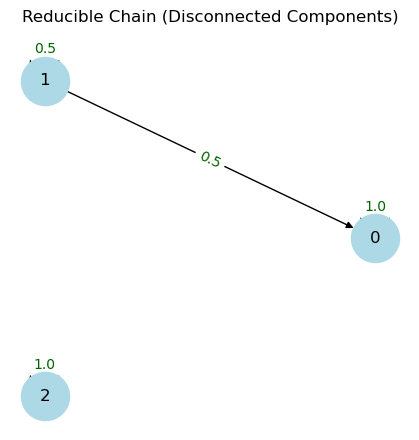

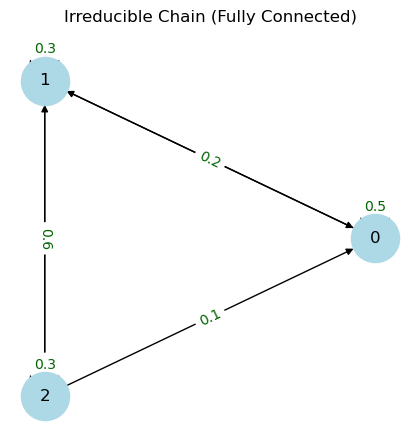

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Reducible transition matrix
Q_reducible = np.array([
    [1.0, 0.0, 0.0],
    [0.5, 0.5, 0.0],
    [0.0, 0.0, 1.0]
])

# Irreducible transition matrix
Q_irreducible = np.array([
    [0.5, 0.5, 0.0],
    [0.2, 0.3, 0.5],
    [0.1, 0.6, 0.3]
])

def plot_chain(Q, title):
    G = nx.DiGraph()
    n = Q.shape[0]
    for i in range(n):
        for j in range(n):
            if Q[i,j] > 0:
                G.add_edge(i, j, weight=Q[i,j])
    pos = nx.circular_layout(G)
    plt.figure(figsize=(4,4))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, arrows=True)
    edge_labels = {(i,j): f"{Q[i,j]:.1f}" for i,j in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='darkgreen')
    plt.title(title)
    plt.show()

plot_chain(Q_reducible, "Reducible Chain (Disconnected Components)")
plot_chain(Q_irreducible, "Irreducible Chain (Fully Connected)")

## Periodicity

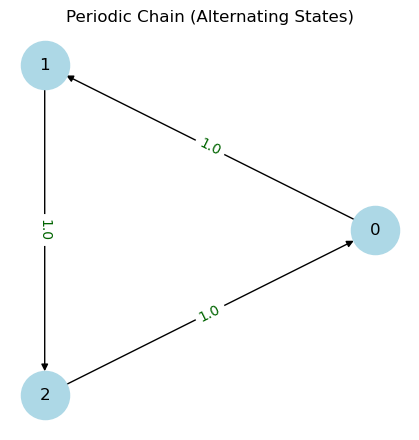

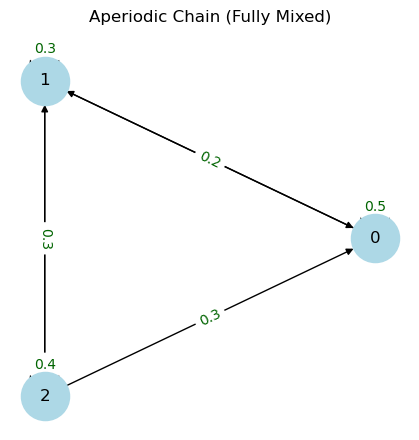

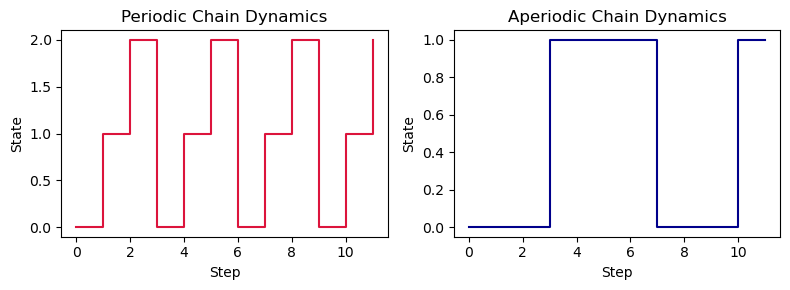

In [23]:
Q_periodic = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0]
])

Q_aperiodic = np.array([
    [0.5, 0.5, 0],
    [0.2, 0.3, 0.5],
    [0.3, 0.3, 0.4]
])

plot_chain(Q_periodic, "Periodic Chain (Alternating States)")
plot_chain(Q_aperiodic, "Aperiodic Chain (Fully Mixed)")

# Simulate transitions
def simulate_chain(Q, n=10, start=0):
    x = start
    states = [x]
    for _ in range(n-1):
        x = np.random.choice(len(Q), p=Q[x])
        states.append(x)
    return states

states_periodic = simulate_chain(Q_periodic, n=12)
states_aperiodic = simulate_chain(Q_aperiodic, n=12)

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.step(range(len(states_periodic)), states_periodic, where='post', color='crimson')
plt.title("Periodic Chain Dynamics")
plt.xlabel("Step"); plt.ylabel("State")
plt.subplot(1,2,2)
plt.step(range(len(states_aperiodic)), states_aperiodic, where='post', color='darkblue')
plt.title("Aperiodic Chain Dynamics")
plt.xlabel("Step"); plt.ylabel("State")
plt.tight_layout()
plt.show()

## Recurrence

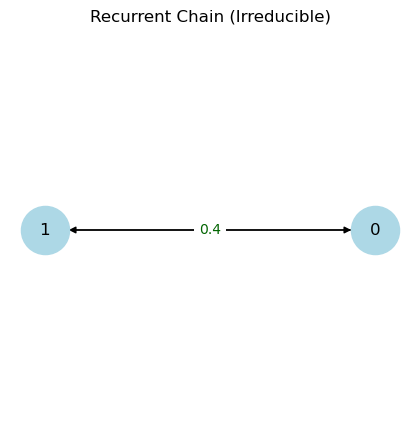

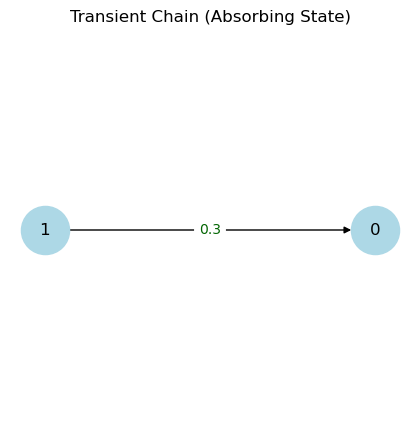

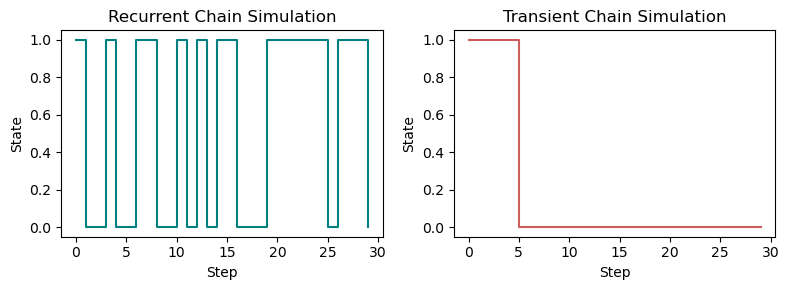

In [22]:
Q_recurrent = np.array([
    [0.5, 0.5],
    [0.4, 0.6]
])

Q_transient = np.array([
    [1.0, 0.0],
    [0.3, 0.7]
])

plot_chain(Q_recurrent, "Recurrent Chain (Irreducible)")
plot_chain(Q_transient, "Transient Chain (Absorbing State)")

# Simulate both
states_recurrent = simulate_chain(Q_recurrent, n=30, start=1)
states_transient = simulate_chain(Q_transient, n=30, start=1)

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.step(range(len(states_recurrent)), states_recurrent, where='post', color='teal')
plt.title("Recurrent Chain Simulation")
plt.xlabel("Step"); plt.ylabel("State")

plt.subplot(1,2,2)
plt.step(range(len(states_transient)), states_transient, where='post', color='indianred')
plt.title("Transient Chain Simulation")
plt.xlabel("Step"); plt.ylabel("State")
plt.tight_layout()
plt.show()

## Ergodicity

In [15]:
# Ergodicity
def stationary_distribution(Q):
    eigvals, eigvecs = np.linalg.eig(Q.T)
    stat = np.real(eigvecs[:, np.isclose(eigvals, 1)])
    stat = stat[:, 0]
    stat = stat / np.sum(stat)
    return stat

Q_ergodic = np.array([
    [0.6, 0.4],
    [0.3, 0.7]
])

Q_nonergodic = np.array([
    [0, 1],
    [1, 0]
])

print("Ergodic chain Q_ergodic:\n", Q_ergodic)
print("Non-ergodic (periodic) chain Q_nonergodic:\n", Q_nonergodic)
print("Stationary distribution (ergodic):", stationary_distribution(Q_ergodic))

# Simulate convergence
def simulate_chain(Q, n=10000, start=0):
    x = start
    counts = np.zeros(Q.shape[0])
    for _ in range(n):
        x = np.random.choice(len(Q), p=Q[x])
        counts[x] += 1
    return counts / np.sum(counts)

print("Simulated long-run distribution (ergodic):", simulate_chain(Q_ergodic))
print("Simulated long-run distribution (non-ergodic):", simulate_chain(Q_nonergodic, n=10))

Ergodic chain Q_ergodic:
 [[0.6 0.4]
 [0.3 0.7]]
Non-ergodic (periodic) chain Q_nonergodic:
 [[0 1]
 [1 0]]
Stationary distribution (ergodic): [0.42857143 0.57142857]
Simulated long-run distribution (ergodic): [0.4332 0.5668]
Simulated long-run distribution (non-ergodic): [0.5 0.5]


Visualizing this

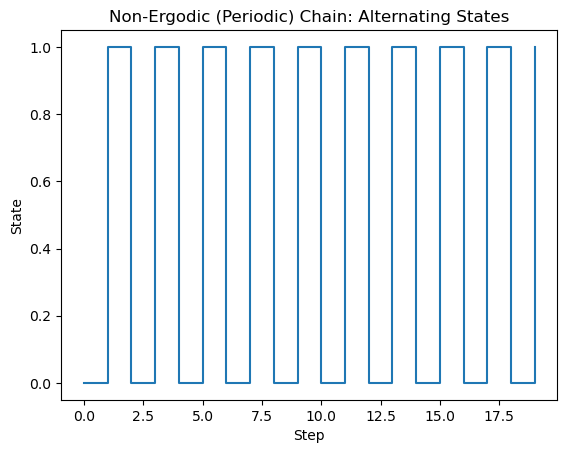

In [16]:
import matplotlib.pyplot as plt

# Simulate periodic chain
states = []
x = 0
for _ in range(20):
    states.append(x)
    x = np.random.choice([0,1], p=Q_nonergodic[x])

plt.step(range(len(states)), states, where='post')
plt.title("Non-Ergodic (Periodic) Chain: Alternating States")
plt.xlabel("Step")
plt.ylabel("State")
plt.show()

# Summary Table — Key Structural Properties of Markov Chains

| **Property** | **Definition / Mathematical Condition** | **Interpretation** | **Example Matrix Behavior** | **Long-Run Outcome** |
|---------------|----------------------------------------|--------------------|-----------------------------|-----------------------|
| **Reducibility** | A chain is **reducible** if there exist states `i, j` such that no integer `n ≥ 1` satisfies $(Q^n)_{ij} > 0$.<br>Otherwise, it is **irreducible**. | Determines whether all states “communicate.”<br>Irreducible chains can reach any state from any other. | **Reducible:** Disconnected or absorbing components.<br>**Irreducible:** Fully connected transitions. | **Reducible:** The chain can get stuck in certain subsets of states.<br>**Irreducible:** One communicating class; possible steady state. |
| **Periodicity** | A state `i` has **period** $d = \gcd\{n>0 : (Q^n)_{ii} > 0\}$.<br>If $d=1$ → **aperiodic**.<br>If $d>1$ → **periodic**. | Measures whether returns to a state occur at fixed multiples of steps. | **Periodic:** Alternating between 2 states (e.g., 0↔1).<br>**Aperiodic:** Can return at irregular times (often via self-loops). | **Periodic:** Oscillates forever, never settles.<br>**Aperiodic:** Mixes smoothly, allows convergence to steady state. |
| **Recurrence / Transience** | A state `i` is **recurrent** if $\sum_{n=1}^{\infty} (Q^n)_{ii} = \infty$ (returns with prob. 1).<br>Otherwise it is **transient**. | Determines whether the chain will eventually revisit a state. | **Recurrent:** Finite irreducible chains; every state revisited infinitely often.<br>**Transient:** Some states eventually left forever (absorbing or escaping). | **Recurrent:** Probability mass stays within states (no loss).<br>**Transient:** Probability leaks out or gets trapped in absorbing states. |

---

### **Quick Interpretation**

| **Property Fails** | **What Happens** |
|---------------------|------------------|
| **Reducibility** | Multiple disconnected “sub-chains.” Behavior depends on initial state. |
| **Periodicity** | Chain cycles in regular patterns; no steady-state convergence. |
| **Transience** | Some states are left forever or lead to absorption. |

---

**Summary Insight:**  
- **Irreducibility** ensures communication between all states.  (all nodes connect)
- **Aperiodicity** removes deterministic oscillations.  (if irreducible, has to have at least 1 nonzero diagonal entry)
- **Recurrence** guarantees the chain revisits states infinitely often.  
Together, these conditions (especially irreducibility + aperiodicity) are what make a Markov chain **ergodic** and capable of reaching a **stable stationary distribution**.